<a href="https://colab.research.google.com/github/gitnicolas343/sistemas-computacionales-inteligentes/blob/main/algotimo_genetico_problema_de_las_8_reinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo Genético para el Problema de las 8 Reinas**
Este ejercicio implementa una solución al clásico problema de las 8 reinas utilizando un algoritmo genético, una técnica inspirada en la evolución biológica. El objetivo es posicionar 8 reinas en un tablero de ajedrez de 8x8 de modo que ninguna se ataque entre sí (es decir, no compartan filas, columnas ni diagonales).

# Objetivos


*   Aplicar principios de algoritmos evolutivos para resolver un problema de optimización combinatoria.
*  Demostrar habilidades en programación en Python y diseño de heurísticas.
*   Construir un ejemplo práctico y visualizable para portafolio académico y profesional.


# **Características del algoritmo**


*   Representación cromosómica eficiente aletorio.
*   Función de idoneidad basada en conflictos entre reinas.
*   Selección por torneo / ruleta.
*   Cruza de un punto / ordenada (según implementación).
*   Mutación con control de probabilidad.
*   Convergencia hacia una solución óptima en un número limitado de generaciones.














In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def poblacion_inicial(tamano_de_poblacion):
    # Debe retornar una matriz de (tamaño de poblacion, 8)
    # Cada fila de la matriz representa un individuo con su gen de 8 elementos
    a = np.random.randint(1,9,size = (tamano_de_poblacion,8))
    return a
    pass

In [26]:
def funcion_idoneidad(poblacion):
    # Debe retornar un vector de tamaño (tamaño poblacion) en el que cada elemento del vector
    # es el valor de idoneidad cada individuo

    idoneidad = list()

    for e in range(len(poblacion)):
        individuo  = poblacion[e]
        ataque_entre_reinas = 0
        ubicacion_reina = list()                                    #ubicacion espacial de las reinas
        columna = 1                                                 #columna inicial
        n = 1
        for i in individuo:                                         #informacion sobre filas
            ubicacion_reina.append((i,columna))                     #agrego la pareja
            columna +=1                                             #columna siguiente
        for i in range(len(ubicacion_reina)):                       #tupla n
            for j in range(i+1,len(ubicacion_reina)):               #tupla n+1
                #print('tuplas seleccionadas=',i,j,'combiancion:',n, 'reinas',ubicacion_reina[i],ubicacion_reina[j])
                if ubicacion_reina[i][0] == ubicacion_reina[j][0]:  #condicion de filas si los indices i , j  son iguales
                    #print('fila')
                    ataque_entre_reinas +=1
                if abs(ubicacion_reina[i][0] - ubicacion_reina[j][0]) == abs(ubicacion_reina[i][1]- ubicacion_reina[j][1]): #comparo las distancias x,y si son iguales quiere decir que estan en un cuadrado y una reina esta en la absisa opuesta
                     #print('diagonal')
                     ataque_entre_reinas +=1
        idoneidad.append(28-ataque_entre_reinas)                   #idoneidad de la prueba

    return np.array(idoneidad)
    pass

In [27]:
def seleccion(poblacion,fun_idoneidad):
    # Retorne los 2 padres que resultan de la seleccion de tipo ruleta
    pesos = fun_idoneidad/np.sum(sum(fun_idoneidad))                                     #probabilidad relativa
    seleccion1 =np.random.choice(len(poblacion),replace = False ,size = 2, p = pesos )    #usamos la funcion choice  csin remplazo par que no se seleccione el mismo individuo, y la configuaramos para que seleccione 2 , configuramos p para que tome las probabilidades relativas de cada individuo
    return poblacion[seleccion1[0]], poblacion[seleccion1[1]]                           #retorno de dos individuos seleccionados tipo ruleta

    pass

    #retorna una tupla con dos arreglos de numpy


In [28]:
def cross_over(padre1,padre2):
    linea_cruze = np.random.randint(1,8)
    hijo1 = list(padre1[:linea_cruze]) + list(padre2[linea_cruze:])
    hijo2 = list(padre2[:linea_cruze])  + list(padre1[linea_cruze:])
    return np.array(hijo1),np.array(hijo2)
    pass

In [29]:
def mutacion(hijo1,hijo2):
    # Retorna los dos hijos mutados
    hijos_mutados = list()
    for hijo in [hijo1,hijo2]:
        pos_aleatrio = np.random.choice(np.arange(0,8))
        if np.random.rand() < 0.2:
            hijo[pos_aleatrio] = np.random.randint(1,9)
            hijos_mutados.append(hijo)
        else:
            hijos_mutados.append(hijo)
    return tuple(hijos_mutados)
    pass



In [30]:
def mostrar_tablero(solucion):
    tablero = np.zeros((8, 8))
    for col, fila in enumerate(solucion):
        tablero[8 - fila][col] = 1

    fig, ax = plt.subplots()
    ax.imshow([[((i + j) % 2) for j in range(8)] for i in range(8)], cmap='gray')

    for col, fila in enumerate(solucion):
        ax.text(col, 8 - fila, '♕', ha='center', va='center', fontsize=24, color='red')

    ax.set_xticks(np.arange(8))
    ax.set_yticks(np.arange(8))
    ax.set_xticklabels(range(1, 9))
    ax.set_yticklabels(range(8, 0, -1))
    ax.set_title(f"Solución ")
    plt.grid(False)
    plt.show()

solucion encontra en la generacion: 81
la solucion es: [6 3 5 8 1 4 2 7]


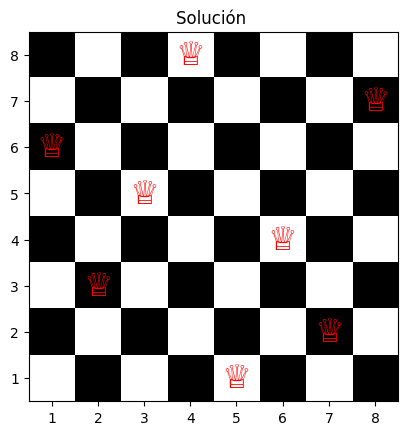

In [31]:
tamaño_de_poblacion = 1000
generaciones = 500000

poblacion1 = poblacion_inicial(tamaño_de_poblacion)
pronidenoidades = list()


for i in range(generaciones):
    nueva_poblacion = list()
    pronidenoidades.append(np.mean(funcion_idoneidad(poblacion1)))                           #verificar y para cuando se encuentre un individuo valido
    if 28 in funcion_idoneidad(poblacion1):                                                  #si el 28 esta en la funcion de dionedad   paro el programa
        a = 0
        for h in funcion_idoneidad(poblacion1):                                              #este ciclo busca el indice donde se encuentra el individuo buscado

            if h == 28:
                    a = poblacion1[a]
                    print('solucion encontra en la generacion:',i )
                    print('la solucion es:',a)
                    mostrar_tablero(a)
                    break
            a = a + 1
        break


    while len(nueva_poblacion) < tamaño_de_poblacion:
            idoneidades = funcion_idoneidad(poblacion1)                                     #con el ciclo while garantizo que se mantenga el numero de individuos en la poblacion , con for salia el doble de individuos
            indv_seleccionado1,indv_seleccionado2 = seleccion(poblacion1,idoneidades)       #una ejecucion de esta ciclo equivale a 1 generacion entera
            hijos11,hijos22 = cross_over(list(indv_seleccionado1),list(indv_seleccionado2))
            clone11,clones22 = mutacion(list(hijos11),list(hijos22))
            nueva_poblacion.append(clone11)
            nueva_poblacion.append(clones22)
    poblacion1 = np.array(nueva_poblacion)




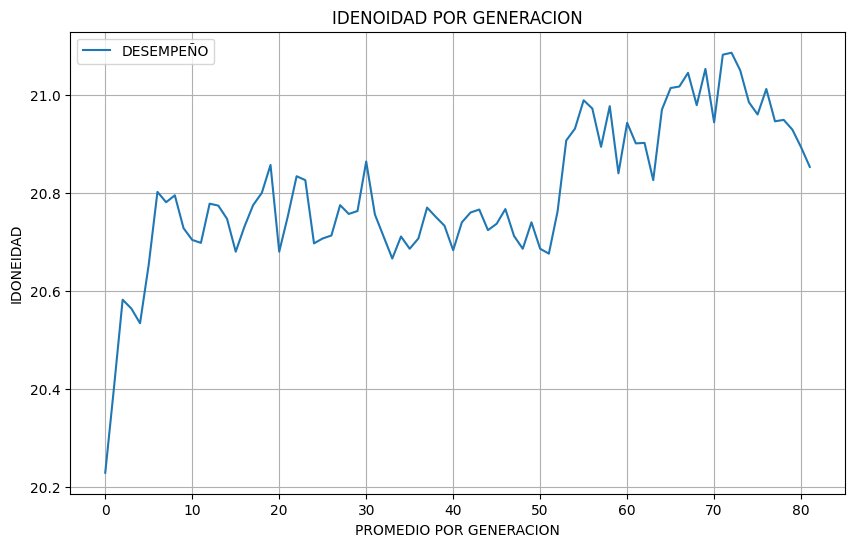

In [33]:
plt.figure(figsize=(10,6))
plt.title('IDENOIDAD POR GENERACION')
plt.plot(pronidenoidades,label = 'DESEMPEÑO')
plt.xlabel('PROMEDIO POR GENERACION')
plt.ylabel('IDONEIDAD')
plt.legend()
plt.grid()
plt.show()